<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Dos posibles resultados:
1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

Problema de optimizacion en busca de encontrar el camino mas corto, este problema tal como su nombre lo indica consiste en encontrar una ruta que conecte a dos o mas nodos de modo que la distancia entre ellos sea minima y para su solucion sera ocupado el alogoritmo de optimizacion Bellman-Ford.

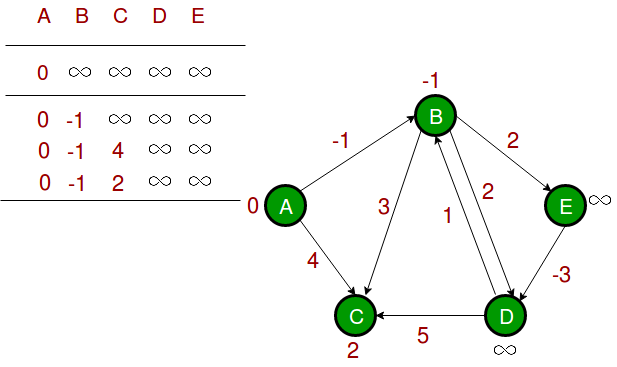

# 2 Descripcion del algoritmo

**El algoritmo Bellman-Ford** con programacion dinamica, busca encontrar el camino mas corto dentro de un grafo, ademas es un metodo que sirve para reducir el tiempo de ejecucion de un algoritmo mediante el uso de subproblemas y subestructuras optimas. Este algoritmo es correcto de usar en este tipo de problema debido a que siempre resuelve los subproblemas pensando en obtener una solucion global/general del problema.

Cabe recalcar que una de sus principales ventajas es que encuentra el camino mas corto incluso si este contiene arcos negativos, tambien cumple la funcion de identificar ciclos negativos es decir cuando este no tiene solucion.



La sub-estructura óptima de este algoritmo basa su funcionamiento en encontrar el camino mas corto entre dos nodos, donde tenemos un nodo origen $"s"$ y $"v"$ que significa la cantidad de nodos adyacentes a la que este puede conectarse mediante caminos sean estos optimos o no. 

Dada esta informacion es posible declarar la subestructura optima como:

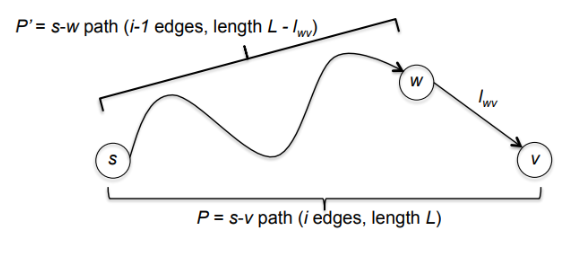

Para encontrar el camino mas optimo entre los nodos anteriormente mencionados, tenemos dos casos:

1. Si conocemos la totalidad de los arcos, podemos decir que la distancia mas optima entre los nodos $s$ y $v$ es la distancia mas optima entre $s$ y un nodo intermedio $w$, que puede ser cualquier nodo existente, pero que su camino sea el camino mas optimo que pueda de encontrar para conectar $s$ y $v$. 

2. Caso contrario podemos decir que el camino mas optimo entre los nodos $s$ y $v$ seria el $i - 1$ arcos.

Consideremos como $L_{i,v}$ el largo mínimo de un camino $s$ a $v$ con a lo más $i-1$ arcos. Luego, para todo $i\geq 1$ y $v \in V$ tenemos que:

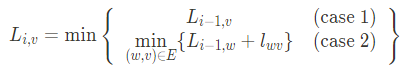

Tambien podemos observar cuando estemos en el caso base es decir $i = 0$, donde tendremos dos posibles casos que a continuacion describiremos.

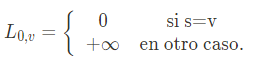

Donde para $i = 0$ arcos considerados, pueden ocurrir dos situaciones:


1. Cuando los nodos $s$ y $v$ son iguales, quiere decir que para una cantidad de cero arcos su distancia que existe desde el nodo origen hasta $v$ es de el mismo coste (0).

2. A comparacion de cuando tenemos que tanto los nodos $s$ y $v$ son distintos, donde se tendra que su cantidad de arcos es 0, esto quiere decir que la distancia entre estos dos nunca podra ser alcanzada, dando asi un coste $infinito$.



**Algoritmo de Dijkstra** al igual que como mencionamos anteriormente este algoritmo busca solucionar el problema del camino mas corto dentro de un grafo, pero con significativas diferencias respecto al Bullman-Ford debido que este no puede trabajar con aristas ni ciclos que sean negativos por lo que no puede de encontrar el camino mas optimo para conectar todo tipo de nodos, aunque para problemas con aristas positivas este lo solucionara de manera mas optima debdio a su modo de funcionamiento, ya que mientras Bullman-Ford busca el camino optimo de todos los nodos a nivel general el algoritmo de Dijkstra busca **''el''** camino mas optimo.

Para resolver este problema con el algoritmo de Dijkstra debe de seguir los siguiente pasos:

1. Debe de marcar el nodo inicial con una distancia actual de 0 y el resto de distancias con infinito

2. Establece el nodo no visitado con la menor distancia actual como el nodo actual A.

3. Para cada adyacente de V de tu nodo actual A: 

  Suma la distancia actual de A con el peso de la arista que conecta a A con V.

  Si el resultado es menor que la distancia actual de V, establécelo como la nueva distancia actual de V.

4. Marca el nodo actual A como visitado.

5. Si hay nodos que no estan visitados, debe de volver al paso 2.

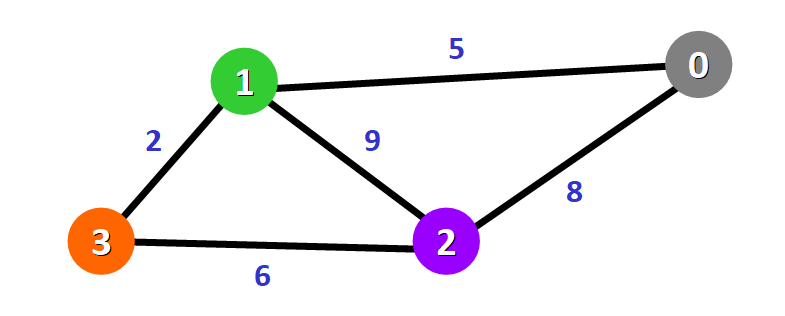

## 2.2 Algoritmo Bellman-Ford

A continuacion se moestrara codigo de su funcionamiento tanto de **Bellman-Ford** como de **Dijkstra**.

In [1]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from sys import maxsize


In [2]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [3]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [37]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator2(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [17]:
def listT_to_matrix(graph, V):
    edges = len(graph)
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in graph:
            newGraph[x][y] = peso

    return newGraph

In [18]:
def minDistance(V, dist, visited):
    min = maxsize
    min_index = 0

    for u in range(V):
        if dist[u] < min and visited[u] == False:
            min = dist[u]
            min_index = u
    
    return min_index

In [63]:
def Dijkstra(graph, V ,src, verbose = False):
  if verbose:
    print("Datos de entrada:")
    print("Grafo:",graph)
    print("Cantidad de vertices:",V)
    print("Nodo de inicio",src)
    print("")

  #Datos:
  dist = [maxsize] * V
  dist[src] = 0
  sptSet = [False] * V
  
  if verbose:
    print("Se recorre desde el nodo inicial hacia todos sus adyacentes\n")
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
  for cout in range(V): #Se recorre desde el nodo inicial hacia todos sus adyacentes

    x = minDistance(V, dist, sptSet) #Distancia minima
    if verbose:
      print("Se busca la distancia minima")
      print("Distancia:",x)
 
    sptSet[x] = True #Se marca el nodo como visitado
    if verbose:
      print("Se marca el nodo como visitado")

    for y in range(V):
      if verbose:
        print("Se busca el camino mas corto y procede a ser guardada en cada iteracion")
        if graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y]: 
          print("dist[y] = dist[x] + graph[x][y]")
          print(dist[y],"=",dist[x] + graph[x][y])
          print("")
        else:
          print("Debido a que no se cumple la siguiente condicion (graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y])")
          print("Se sigue en la siguiente iteracion")
          print("")

      if graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y]: #Camino mas optimo
        dist[y] = dist[x] + graph[x][y]
    if verbose:
      print("--------------------------------------------------------------------------------------------------------------------------------------------")

  if verbose:  
    print("Vértice \Distancia desde la fuente")
    for node in range(V):
      print(node, "\t", dist[node])

In [4]:
#Algoritmo Bellman-Ford

def BellmanFord(graph, V, E, src, visualize = False, verbose = False):
	if verbose:
		print("Datos de entrada")
		print("Grafo:", graph)
		print("Cantidad de vertices:", V)
		print("Cantidad de nodos:", E)
		print("Nodo Inicio", src)
		print("")
	
	#Datos: 
	dis = [maxsize] * V
	dis[src] = 0

	if verbose: 
		print("Se recorre desde el nodo inicial hacia todos sus adyacentes\n")
  #Ciclos iterativos
	for i in range(V - 1): #Tras la inicializacion de nuestros valores comenzamos las iteraciones que buscaran el camino mas optimo.
		if verbose:
			print("Nodo Actual:",i)
		for j in range(E):
			if verbose:
				print("Se verifica la distancia entre los nodos",dis[graph[j][0]],"y", graph[j][2],", si esta es menor a ", dis[graph[j][1]])
				if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
					print("Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos")
					print("Donde esto quiere decir que los valores se van reduciendo de manera consecutiva\n")
				print("")
		
			if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]: #Relajacion de nodos
				dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]
		if verbose:
			print("----------------------------------------------------------------------------------------------------------")
	
	for i in range(E):
		x = graph[i][0]
		y = graph[i][1]
		weight = graph[i][2]
		if dis[x] != maxsize and dis[x] + weight < dis[y]:
			if verbose:
				print("El gráfico contiene un ciclo de peso negativo")
	if verbose:
		print("Distancia del vértice desde la fuente")
		for i in range(V):
			print("%d\t\t%d" % (i, dis[i]))
	
	if visualize:
		grafo = graph_to_nxdigraph(graph,V)
		pos=nx.spring_layout(grafo,20)
		labels = nx.get_edge_attributes(grafo, "weight")
		nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=14)
		nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")



## 2.3. **Ejemplo Verbose Dijkstra**

In [64]:
a, b = instance_generator2(3)
grafo2 = listT_to_matrix(a, 3)
Dijkstra(a, len(grafo2), 0, True)  

Datos de entrada:
Grafo: [(1, 2, 32), (0, 1, 63), (2, 0, 68)]
Cantidad de vertices: 3
Nodo de inicio 0

Se recorre desde el nodo inicial hacia todos sus adyacentes

--------------------------------------------------------------------------------------------------------------------------------------------
Se busca la distancia minima
Distancia: 0
Se marca el nodo como visitado
Se busca el camino mas corto y procede a ser guardada en cada iteracion
Debido a que no se cumple la siguiente condicion (graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y])
Se sigue en la siguiente iteracion

Se busca el camino mas corto y procede a ser guardada en cada iteracion
dist[y] = dist[x] + graph[x][y]
9223372036854775807 = 2

Se busca el camino mas corto y procede a ser guardada en cada iteracion
dist[y] = dist[x] + graph[x][y]
9223372036854775807 = 32

--------------------------------------------------------------------------------------------------------------------------------

## 2.4. **Ejemplo Bellman-Ford**

Se ingresa el grafo con los siguientes valores, tales como arco nodos y nodo fuente.

Grafo = [(5, 8, 21),(9, 0, 12),(0, 1, 31),(0, 42, 78)]

Siendo cada valor de la forma G(A,B,C):

A = Nodo de comienzo 

B = Nodo de Llegada

C = El peso entre sus distancias

1. Como primer paso se inicializan nuestras variables en infinito a excepcion, de nuestro valor de entrada de nodo fuente.  ej: dis[0,9999999,9999999]

2. Tras la inicializacion de nuestros valores comenzamos las iteraciones que buscaran el camino mas optimo.

  Para esto usaremos dos ciclos anidados, el primero funcionara desde los intervalos desde 0 hasta V - 1 y el otro desde 0 hasta E. Siendo V los vertices y E la cantidad de nodos.

  Tras estos ciclos anidados, preguntaremos dentro del segundo ciclo iterativo si dis[Grafo[0][0]] + Grafo[0][2] < dis[Grafo[0][1]] / 
  dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]:

  Siendo cada una de estas variables:

  Si (9999999 + 21) < 9999999:
  
    9999999 = 9999999 + 21

3. Estas iteraciones continuaran hasta revisar todos los caminos y encontrar el mas optimo. 








## 2.5. **Ejemplo Verbose Bellman-Ford**

In [70]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, False, True)  

Datos de entrada
Grafo: [(0, 4, 52), (3, 4, 98), (4, 1, 35), (2, 3, 52), (2, 4, 59), (1, 3, 25), (1, 0, 35), (1, 2, 40)]
Cantidad de vertices: 5
Cantidad de nodos: 8
Nodo Inicio 0

Se recorre desde el nodo inicial hacia todos sus adyacentes

Nodo Actual: 0
Se verifica la distancia entre los nodos 0 y 52 , si esta es menor a  9223372036854775807
Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos
Donde esto quiere decir que los valores se van reduciendo de manera consecutiva


Se verifica la distancia entre los nodos 9223372036854775807 y 98 , si esta es menor a  52

Se verifica la distancia entre los nodos 52 y 35 , si esta es menor a  9223372036854775807
Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos
Donde esto quiere decir que los valores se van reduciendo de manera consecutiva


Se verifica la distancia entre los nodos 9223372036854775807 y 52 , si esta es menor a  9223372036854775807

Se verifica la distancia entr

## 2.6. **Ejemplo Visualize Bellman-Ford**

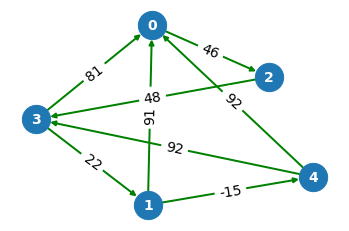

In [102]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, True) 

#3. Correctitud algoritmo de Bellman Ford

##**Teorema**

El algoritmo de Bellman Ford calcula la distancia desde un nodo inicial $s$ al resto de nodos adyacentes $v$ sin ciclos negativos.

##Prueba del teorema

Para demostrar la correctitud de este algoritmo haremos uso de la demostración por inducción, para esto necesitaremos de un caso base y de un caso inductivo.

> Caso base ($V = 1$): El caso base ocurre cuando la cantidad de nodos $V = 1$, como es el único nodo de nuestro grafo el algoritmo asume directamente que la distancia $d(s,v) = 0$, por lo tanto podemos confirmar que para nuestro caso base el algoritmo funciona.

> Caso inductivo ($V = k + 1$): Para realizar la prueba de nuestro caso inductivo consideraremos que para una cantidad de $k$ nodos nuestro algoritmo consigue encontrar el camino mínimo desde el nodo inicial hasta los $k - 1$ nodos adyacentes, por lo tanto ahora toca demostrar que para $k + 1$ nodos esto también funciona. Sabemos que para cada iteración $i + 1$ se cumple $d[v, i + 1] ≤ d[u, i] + w[u, v]$ por el paso de reajuste del algoritmo. Como en cada iteración se recorren todos los arcos del grafo podemos asegurar que el algoritmo en todo momento conseguirá la distancia más corta entre el nodo $s$ hasta $v$.

#4. Tiempo de Ejecución

##4.1. Algoritmo Bellman Ford

###**Caso Promedio**

Como podemos ver analizando el código, nuestro algoritmo necesitará la ayuda dos ciclos iterativos para poder encontrar el camino más corto y un tercero para verificar si había un ciclo negativo o no, el primer ciclo recorre la cantidad de nodos desde $0$ hasta $V - 1$ donde $V$ representa la cantidad de Nodos, el segundo ciclo se recorre desde $0$ hasta $E$ donde $E$ representa la cantidad de arcos de nuestro grafo y el tercer ciclo va desde $0$ hasta $E$.

Por lo tanto al tener este analisis previo y conociendo el código de nuestro algoritmo podemos definir una función que represente la cantidad de procesos realizados.

$T(V, E) = \sum\limits_{i = 0}^{V - 1}(\sum\limits_{j = 0}^{E}(1)) + \sum\limits_{k = 0}^{E}(1)$

$T(V, E) = \sum\limits_{i = 0}^{V - 1}(c*E) + c*E$

$T(V, E) = c*E*V + c*E$

$T(V, E) = O(V*E) + O(E)$

Por lo tanto la complejidad temporal de nuestro caso promedio viene siendo de O(V*E).

###**Mejor caso**

Para demostrar el mejor caso se debe tener algo en cuenta, este ocurre cuando todos los nodos con sus arcos se encuentran alineados de la siguiente forma.




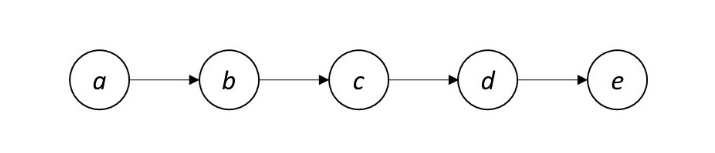

Es este caso el calculo del camino más corto se realiza muy rápido ya que el algoritmo solo tendrá que verificar un solo nodo de llega y no deberá recorrer una cantidad $V$ de nodos adyacentes, así que para este caso solo necesitaremos 2 iteraciones por los arcos del grafo, el primero será para calcular los caminos más cortos y el otro para verificar que no ocurran más cambios en las ditancias. Por lo tanto la complejidad es de $O(E)$.

###**Peor caso**

El peor caso ocurrirá cuando el grafo analizado sea un grafo completo, a esto nos referimos que para una cantidad $V$ de nodos habrá una cantidad $V(V - 1)$ al ser un grafo dirigido. por lo tanto nuestra función quedará de la siguiente forma.

$T(V, V(V - 1)) = \sum\limits_{i = 0}^{V - 1}(\sum\limits_{j = 0}^{V(V - 1)}(1)) + \sum\limits_{k = 0}^{V(V - 1)}(1)$

$T(V, V(V - 1)) = \sum\limits_{i = 0}^{V - 1}(c*V(V - 1)) + c*V(V-1)$

$T(V, V(V - 1)) = c*V(V - 1) * V + c(V^2-V)$

$T(V, V(V - 1)) = c*V^2(V - 1) + O(V^2)$

$T(V, V(V - 1)) = c*(V^3 - V^2) + O(V^2)$

$T(V, V(V - 1)) = O(V^3) + O(V^2)$

$T(V, V(V - 1)) = O(V^3)$

Por lo tanto con esto podemos demostrar que el tiempo de ejecución de nuestro algoritmo es de $O(V^3)$.

##4.2. Algoritmo de Dijkstra

Para analizar el tiempo de ejecución de nuestro algoritmo primero debemos analizar el código, como podemos apreciar tenemos un primer ciclo el cual recorre desde 0 hasta $V$ donde $V$ representa la cantidad de nodos de nuestro grafo, y a la vez este algoritmo contiene otro ciclo anidado el cual también va desde 0 hasta $V$, teniendo esto en cuenta podemos realiza la siguiente función.

$T(V) = \sum\limits_{i = 0}^{V}(\sum\limits_{j = 0}^{V}(1))$

$T(V) = \sum\limits_{i = 0}^{V}(c*V)$

$T(V) = c*V * V$

$T(V) = c*V^2$

$T(V) = O(V^2)$

Por lo tanto al ver este analisis podemos verificar que la complejidad temporal de nuestro algoritmo es de $O(V^2)$.

# 5. Experimentos


##5.1.Tiempo de ejecucion

Se realiza los experimentos para el algoritmo Bellman-Ford donde calcularemos su tiempo de ejecucion en un intervalo de valores desde el 5 hasta el 25.

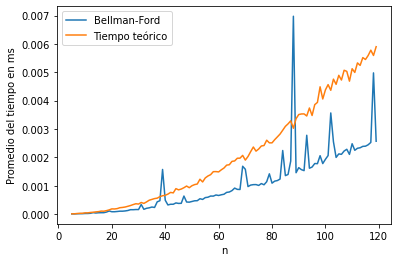

In [107]:
x = []
y = []
y_teo = []

for n in range(5,120):
  graph, s = instance_generator(n)
  prom = 0

  for j in range(25):
    prom = 0
    tiempo = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph},{n},{len(graph)},{s})", repeat=1, number=10)
    prom = tiempo[0]/25

  x.append(n)
  y.append(prom)
  y_teo.append(n*len(graph)/5000000) #La escala de tiempo es a 5 millones


plt.plot(x,y)
plt.plot(x,y_teo)
plt.legend(["Bellman-Ford", "Tiempo teórico"])
plt.xlabel('n')
plt.ylabel('Promedio del tiempo en ms')
plt.show()


### Análisis de resultados

Por lo que podemos observar lo calculado en el tiempo de ejecución es correcto, solo hubo que ajustar la escala dividiendo $(VE)$ en 5 millones, porque esa escala es en la que tardan los subproblemas en resolverse por el entorno de ejecución, además cabe recalcar que los peaks como se comprobó anteriormente tienen relación a procesos externos al algoritmo.

##5.2.Comparacion entre algoritmo de Bellman-Ford y Dijkstra 

Se realiza los experimentos para el algoritmo Bellman-Ford y Dijkstra, donde estos seran comparadas en un intervalo de valores de 5 hasta 50 

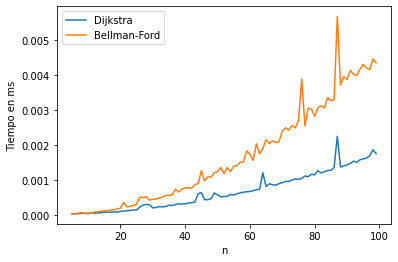

In [101]:
x=[]; y1=[]; y2=[]

for n in range(5,100):
  G, a = instance_generator(n)

  c, b = instance_generator2(n)
  G2 = listT_to_matrix(c, n)

  t1 = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({G2},{len(G2)},{0})", repeat=1, number=1)
  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({G},{n},{len(G)},{a})", repeat=1, number=1)

  x.append(n)
  y1.append(t1)
  y2.append(t)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Dijkstra", "Bellman-Ford"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Podemos observar que el algoritmo de Bellman-Ford supera en tiempo de ejecución al de Dijkstra, esto puede deberse a las optimizaciones realizadas al primero, en las que la ejecución era detenida en caso de encontrar la solución en pocas iteraciones, dándose pocas veces los peores casos por el instanciador de grafos. Además que el instanciador no agrega demasiados arcos siendo este valor el punto fuerte del algoritmo de Dijkstra ya que, recordando la complejidad de ambos algoritmos, el de Bellman-Ford podría verse mucho más influenciado por los arcos que el de Dijkstra, y debido a que existe un límite de arcos, es que después de cierto punto solo se vuelve una constante, compitiendo un algoritmo de complejidad lineal $O(V)$ que es el de Bellman contra el de Dijkstra que es $O(Vlog(V))$.